# Comparative Analysis for a Bike Sharing Company
_This is a notebook by Olamilekan Razak Elegbede._

## Introduction
This is a case-study for a bike-sharing company with a fleet of 5,824 bicycles including (Electric, Classic and Docked Bikes) which are located in a network of 692 stations across Chicago. Bicycles can begin at a station and be returned to any station. The company provides bicycles to annual members and casual riders which come as single-ride passes and full-day passes.
The aim of this project is to understand bike users behaviour and come up with strategies to convert casual members to annual member riders.

Tha aim of the Juypter Library is to clean the datasets, perform EDA and export the cleaned dataset for analysis and visualization.

## Contents

[1. Import Libraries]

# 1. Import Libraries

Here I import all the libraries to be used in this notebook. It's good practice to have all library imports in a single place so you keep track of them.

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from matplotlib import pyplot as plt
from scipy.stats import skew # To check scewnewss
from geopy.distance import geodesic
import plotly.express as px


Libraries imported.

# 2. Import Month-Month Dataset

In [3]:
# Import all the monthly csv dataset
nov_20 = pd.read_csv("/Users/lekan/Desktop/Jupyter Notebook/Cyclistic Project/202011-divvy-tripdata.csv")
dec_20 = pd.read_csv("/Users/lekan/Desktop/Jupyter Notebook/Cyclistic Project/202012-divvy-tripdata.csv")
jan_21 = pd.read_csv("/Users/lekan/Desktop/Jupyter Notebook/Cyclistic Project/202101-divvy-tripdata.csv")
feb_21 = pd.read_csv("/Users/lekan/Desktop/Jupyter Notebook/Cyclistic Project/202102-divvy-tripdata.csv")
march_21 = pd.read_csv("/Users/lekan/Desktop/Jupyter Notebook/Cyclistic Project/202103-divvy-tripdata.csv")
april_21 = pd.read_csv("/Users/lekan/Desktop/Jupyter Notebook/Cyclistic Project/202104-divvy-tripdata.csv")
may_21 = pd.read_csv("/Users/lekan/Desktop/Jupyter Notebook/Cyclistic Project/202105-divvy-tripdata.csv")
jun_21 = pd.read_csv("/Users/lekan/Desktop/Jupyter Notebook/Cyclistic Project/202106-divvy-tripdata.csv")
july_21 = pd.read_csv("/Users/lekan/Desktop/Jupyter Notebook/Cyclistic Project/202107-divvy-tripdata.csv")
aug_21 = pd.read_csv("/Users/lekan/Desktop/Jupyter Notebook/Cyclistic Project/202108-divvy-tripdata.csv")
sept_21 = pd.read_csv("/Users/lekan/Desktop/Jupyter Notebook/Cyclistic Project/202109-divvy-tripdata.csv")
oct_21 = pd.read_csv("/Users/lekan/Desktop/Jupyter Notebook/Cyclistic Project/202110-divvy-tripdata.csv")
nov_21 = pd.read_csv("/Users/lekan/Desktop/Jupyter Notebook/Cyclistic Project/202111-divvy-tripdata.csv")


We need to join all month tables into a single table. Since all tables have the same data field, we can use a pandas concat statement to perform this join.

In [4]:
all_months = [nov_20, dec_20, jan_21, feb_21, march_21, april_21, may_21, jun_21, july_21, aug_21, sept_21, oct_21, nov_21]
df_months = pd.concat(all_months) # Join all months


# 3. Data Exploration

In [5]:
# Display the number of rows, row names and the row type
df_months.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5738812 entries, 0 to 359977
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 613.0+ MB


In [6]:
# Get Descriptive stats of the dataframe
df_months.describe()

,start_lat,start_lng,end_lat,end_lng
count,5.738812e+06,5.738812e+06,5.733790e+06,5.733790e+06
mean,4.190128e+01,-8.764586e+01,4.190155e+01,-8.764608e+01
std,4.599924e-02,2.838949e-02,4.610089e-02,2.856902e-02
min,4.164000e+01,-8.784000e+01,4.139000e+01,-8.897000e+01
25%,4.188169e+01,-8.766000e+01,4.188189e+01,-8.766000e+01
50%,4.189897e+01,-8.764182e+01,4.189993e+01,-8.764275e+01
75%,4.192914e+01,-8.762772e+01,4.192947e+01,-8.762775e+01
max,4.208000e+01,-8.752000e+01,4.216812e+01,-8.744000e+01


In [7]:
# Explore rows in the dataframe using sample, to randomize the outcome
df_months.sample(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
233213,4F1570DD12070962,classic_bike,2021-05-14 20:58:48,2021-05-14 21:08:09,Greenview Ave & Diversey Pkwy,13294,Larrabee St & Webster Ave,13193,41.932590,-87.665936,41.921822,-87.644140,member
76037,7B91983AA09F2982,docked_bike,2020-11-21 11:17:16,2020-11-21 11:29:35,Morgan St & 31st St,280.0,Halsted St & 18th St,202.0,41.837800,-87.651140,41.857499,-87.646277,member
68368,5F62AA00BBDCEE03,classic_bike,2021-06-05 02:27:07,2021-06-05 03:08:45,Lake Shore Dr & Monroe St,13300,Lake Shore Dr & Monroe St,13300,41.880958,-87.616743,41.880958,-87.616743,casual
40228,57008A443EF4CBF2,classic_bike,2020-12-14 18:00:54,2020-12-14 18:24:20,Sedgwick St & Webster Ave,13191,Canal St & Madison St,13341,41.922167,-87.638888,41.882091,-87.639833,member
403941,3E5E6BCB6796F41C,classic_bike,2021-08-31 14:16:01,2021-08-31 14:28:06,Halsted St & Dickens Ave,13192,Broadway & Barry Ave,13137,41.919936,-87.648830,41.937582,-87.644098,member


In [8]:
df_months.shape

(5738812, 13)

A brief overview of our data

In [9]:
print('From our raw dataset: \nWe have a total of {} rides.'.format(df_months['ride_id'].count()))
print('{} are annual members.'.format((df_months[df_months['member_casual']=='member'].shape[0])))
print('{} are casual riders.'.format((df_months[df_months['member_casual']=='casual'].shape[0])))
print()
print('For the different bikes usage:')
print('{} classic bikes.'.format(df_months[df_months['rideable_type'] == 'classic_bike'].shape[0]))
print('{} electric bikes.'.format(df_months[df_months['rideable_type'] == 'electric_bike'].shape[0]))
print('{} docked bikes.'.format(df_months[df_months['rideable_type'] == 'docked_bike'].shape[0]))

From our raw dataset: 
We have a total of 5738812 rides.
3161366 are annual members.
2577446 are casual riders.

For the different bikes usage:
3221009 classic bikes.
2045802 electric bikes.
472001 docked bikes.


Find missing values

# 4. Data Preprocessing

In [10]:
# Convert column type from an object to a datetime type 

#df_months['started_at'] = pd.to_datetime(df_months['started_at'])
#df_months['ended_at'] = pd.to_datetime(df_months['ended_at'])

df_months['started_at'] = pd.to_datetime(df_months['started_at'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
df_months['ended_at'] = pd.to_datetime(df_months['ended_at'], errors='coerce', format='%Y-%m-%d %H:%M:%S')

In [11]:
# Find the ride length given the start and end time

df_months['ride_duration'] = df_months['ended_at']-df_months['started_at']
df_months['ride_duration(s)'] = df_months['ride_duration'].dt.total_seconds() # Convert the column to total seconds.

In [12]:
# Create new columns to extract the time 88:88:88 from the date columns

df_months['start_time'] = df_months['started_at'].dt.strftime('%H:%M:%S') # Time when rides started 
df_months['end_time'] = df_months['ended_at'].dt.strftime('%H:%M:%S') # Time when rides ended 

In [13]:
# Extract the day name and month/year for when trips started from the start time column.

df_months['day'] = df_months['started_at'].dt.day_name()
df_months['month'] = df_months['started_at'].dt.strftime("%b-%y")

In [14]:
df_months.shape

(5738812, 19)

In [15]:
df_months.sample(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,ride_duration(s),start_time,end_time,day,month
130850,0592A3F86A517967,classic_bike,2021-04-02 11:36:49,2021-04-02 12:07:48,Lakefront Trail & Bryn Mawr Ave,KA1504000152,Halsted St & Roscoe St,TA1309000025,41.984037,-87.652310,41.943670,-87.648950,member,0 days 00:30:59,1859.0,11:36:49,12:07:48,Friday,Apr-21
83665,78959FBFEDACD7FB,electric_bike,2021-10-21 16:46:08,2021-10-21 16:52:36,Orleans St & Chestnut St (NEXT Apts),620,Carpenter St & Huron St,13196,41.898127,-87.637519,41.894895,-87.653039,casual,0 days 00:06:28,388.0,16:46:08,16:52:36,Thursday,Oct-21
31275,8C4A7A4060D0410D,electric_bike,2021-03-08 18:03:59,2021-03-08 18:32:29,Calumet Ave & 33rd St,13217,Michigan Ave & Washington St,13001,41.834802,-87.617881,41.884053,-87.624601,member,0 days 00:28:30,1710.0,18:03:59,18:32:29,Monday,Mar-21


### Calculate trip distance

We have been provided, the start and end latitude in seperate data fields.
With this information, we can get the position and then calculate the trip distance.

In [16]:
# We create new data fields to join and store the latitude and longitude in a list

df_months['start_position'] = list(zip(df_months['start_lat'],df_months['start_lng']))
df_months['end_position'] = list(zip(df_months['end_lat'],df_months['end_lng']))

In [17]:
# Create a function that calculates the distance between start and end positions

from geopy.distance import geodesic

def calculate_distance(row):
    start_position = tuple(row['start_position']) 
    end_position = tuple(row['end_position']) 

     # Check for NaN values
    if any(pd.isna(coord) for coord in start_position + end_position):
        return None  

    return str(round(geodesic(start_position, end_position).km,2)) + ' km'

# Apply the function to calculate distance for each row
df_months['trip_distance'] = df_months.apply(calculate_distance, axis=1)


Preview our data fields - should be the same number of rows, just additional data fields.

In [18]:
# Convert our trip_distance field to a float type
def str_to_num(x):
    if isinstance(x,str):
        x = x.strip('km')
        x = float(x)
    return x

# Use .apply() to apply this to ever row in the field.
df_months['trip_distance'] = df_months['trip_distance'].apply(str_to_num)

In [19]:
df_months.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5738812 entries, 0 to 359977
Data columns (total 22 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  ride_duration       timedelta64[ns]
 14  ride_duration(s)    float64        
 15  start_time          object         
 16  end_time            object         
 17  day                 object         
 18  month               object         
 19  start_position      object 

# 5. Data Cleaning

Now that we have gotten all our additional fields, it is time to eliminate 'bad data' and clean our dataset for exploration and analysis.

In [20]:
df_months.sample(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,ride_duration,ride_duration(s),start_time,end_time,day,month,start_position,end_position,trip_distance
200207,933045C7EA202E2C,electric_bike,2021-06-12 20:13:06,2021-06-12 20:21:50,Malcolm X College Vaccination Site,631,Wood St & Chicago Ave,637,41.877581,-87.673885,...,member,0 days 00:08:44,524.0,20:13:06,20:21:50,Saturday,Jun-21,"(41.87758083333333, -87.67388533333333)","(41.89549383333333, -87.67213766666667)",1.99
22045,B8C48FE1BD64CDD3,electric_bike,2020-11-12 17:25:55,2020-11-12 18:32:04,Millennium Park,90.0,LaSalle St & Adams St,40.0,41.881101,-87.624103,...,casual,0 days 01:06:09,3969.0,17:25:55,18:32:04,Thursday,Nov-20,"(41.881101, -87.62410333333334)","(41.879238666666666, -87.63416483333333)",0.86
133835,A537484540FA3233,classic_bike,2021-09-26 16:31:01,2021-09-26 16:43:37,Adler Planetarium,13431,Indiana Ave & Roosevelt Rd,SL-005,41.866095,-87.607267,...,casual,0 days 00:12:36,756.0,16:31:01,16:43:37,Sunday,Sep-21,"(41.866095, -87.607267)","(41.867888, -87.623041)",1.32


### Conditions used to eliminate bad data:
1. If the ride duration is zero, this means the trip never started. So we drop time values that are negative or zero.
2. We also elminate trip distance that are less than or equal to 0 kms because it shows the customer never left the station.

In [21]:
# Remove rows where trip distance is <= 0 AND ride duration <= 0

# We combine the conditions using AND (&) and store the clean value
df_months_clean = df_months[(df_months['trip_distance'] > 0) & (df_months['ride_duration(s)'] > 0)]
df_months_clean.shape

(5188328, 22)

## New Dataframe - Rides Info: stores key information on the rides

In [22]:
ride_info = df_months_clean.loc[:,['month','ride_id','member_casual','rideable_type','day','start_time','end_time', 'ride_duration',
                             'ride_duration(s)','trip_distance','start_position','end_position','start_station_id','end_station_id']]
ride_info.sample(5)

,month,ride_id,member_casual,rideable_type,day,start_time,end_time,ride_duration,ride_duration(s),trip_distance,start_position,end_position,start_station_id,end_station_id
319171,Aug-21,14BC25C637E5CCFB,member,classic_bike,Saturday,16:16:47,16:43:33,0 days 00:26:46,1606.0,1.66,"(41.860384, -87.625813)","(41.845687, -87.622481)",SL-012,TA1307000005
31558,Jul-21,DDCD1A126298E20E,member,classic_bike,Wednesday,23:15:45,23:26:24,0 days 00:10:39,639.0,2.22,"(41.963004, -87.684781)","(41.965221, -87.658139)",TA1307000156,13074
80214,Oct-21,D1A2BF681CA920C1,casual,electric_bike,Monday,12:53:53,13:06:29,0 days 00:12:36,756.0,1.71,"(41.91055083333333, -87.6493875)","(41.903457333333336, -87.66774233333334)",13058,13061
72033,Nov-20,CA81D10ECD661E42,member,docked_bike,Sunday,10:32:05,10:39:59,0 days 00:07:54,474.0,1.76,"(41.952833, -87.649993)","(41.93758231600629, -87.6440978050232)",256.0,300.0
462387,Aug-21,7144B54B0E53E08C,casual,classic_bike,Tuesday,16:59:42,17:07:37,0 days 00:07:55,475.0,2.08,"(41.918306, -87.636282)","(41.932418, -87.652705)",13146,TA1306000014


EDA - Find and Drop Outliers

In [23]:
# Function to make our viz more readable
def readable_numbers(x):
    """takes a large number and formats it into K,M to make it more readable"""
    if x >= 1e3:
        s = '{:1.1f}K'.format(x*1e-3)
    else:
        s = '{:1.0f}'.format(x*1e-0)
    return s

# Use the readable_numbers() function to create a new column 
ride_info['ride_duration_readable']=ride_info['ride_duration(s)'].apply(readable_numbers)

/var/folders/t2/1bvrk4z56jl4gvbfwxndl18m0000gn/T/ipykernel_2858/4170398475.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))


Text(0.5, 1.0, 'Distribution of the Ride Duration')

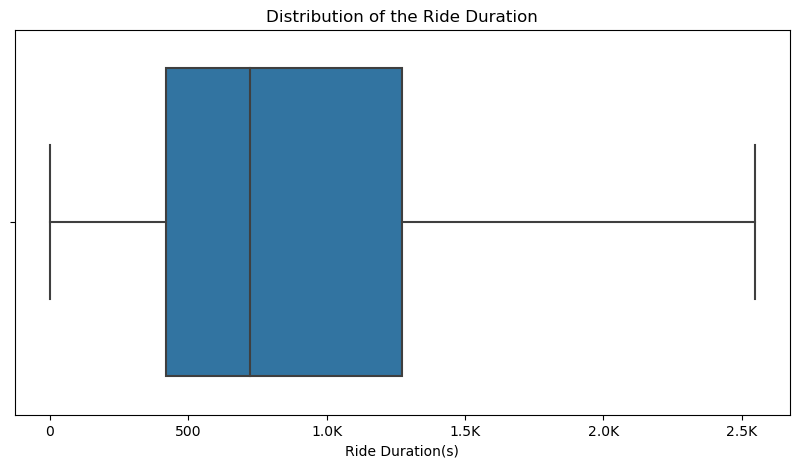

In [24]:
# Create a boxplot
plt.figure(figsize=(10,5))
box = sns.boxplot(x=ride_info['ride_duration(s)'], showfliers = False)
g = plt.gca()
box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))
plt.xlabel('Ride Duration(s)')
plt.title('Distribution of the Ride Duration')

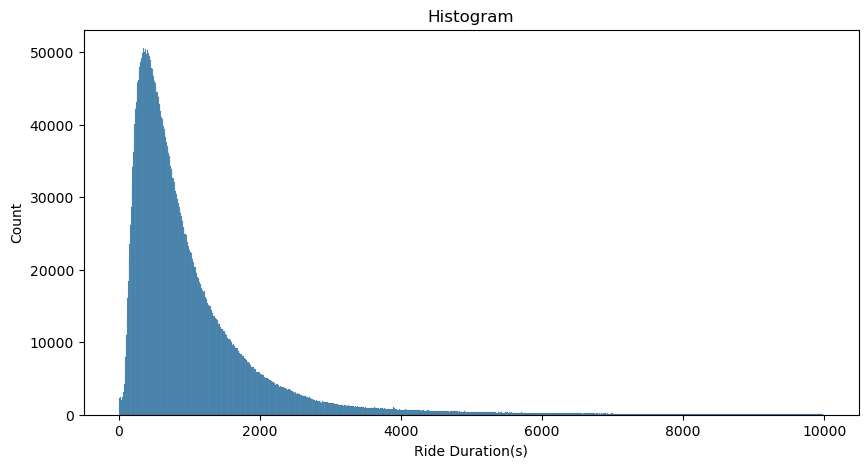

In [25]:
# Check Skewness
plt.figure(figsize = (10,5))
sns.histplot((ride_info['ride_duration(s)']), bins = range(0,10000,10))
plt.xlabel('Ride Duration(s)')
plt.title('Histogram')
plt.show()

In [26]:
from scipy.stats import skew
(ride_info['ride_duration(s)']).skew()

159.55969826168945

In [27]:
#Before removing outliers
print("The mean before removing outliers is {}.".format(np.mean(ride_info['ride_duration(s)'])))
print("The median before removing outliers is {}.".format(np.median(ride_info['ride_duration(s)'])))

The mean before removing outliers is 1214.3863498992353.
The median before removing outliers is 724.0.


From the histogram, we notive we have a right skewed data, meaning that majority of the ride durations are concentrated on the left side and only a few larger values that extend to the right side, which ideally is what we want.

But when we calculate the skew, we have a large value (159.879) but our skew should be in the range of -1 to 1 or close to these values.

So to achieve this, we need to eliminate outliers from our dataset as shown below.

### Removing Outliers

I decided to go with a 95th percentile to get our upper limit because it gives a better representation of what our data should be.

In [28]:
# Calculate 25th percentile of ride duration(s)
percentile25 = ride_info['ride_duration(s)'].quantile(0.25)

# Calculate 95th percentile of ride duration(s)
percentile95 = ride_info['ride_duration(s)'].quantile(0.95)

# Calculate interquartile range
iqr = percentile95 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit = percentile95 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('Percentile 25 is: {} '.format(percentile25))
print('Percentile 95 is: {}'.format(percentile95))
print('IQR is: {}'.format(iqr))
print('Lower limit is: {}'.format(lower_limit))
print('Upper limit is: {}'.format(upper_limit))

Percentile 25 is: 421.0 
Percentile 95 is: 3002.0
IQR is: 2581.0
Lower limit is: -3450.5
Upper limit is: 6873.5


In [29]:
#Remove outliers
ride_info_clean = ride_info[(ride_info['ride_duration(s)'] >= lower_limit) & (ride_info['ride_duration(s)'] <= upper_limit)]

In [30]:
# Check skew value after removing outliers
from scipy.stats import skew
(ride_info_clean['ride_duration(s)']).skew()

2.5347639000037594

After dropping the outliers, we find check the skew and it is about 2.52, which is close to the range we are looking to be.

In [31]:
#After removing outliers
d_mean = np.mean(ride_info_clean['ride_duration(s)'])
d_median = np.median(ride_info_clean['ride_duration(s)'])
print("Mean: {}s".format(d_mean))
print("Median: {}s".format(d_median))

Mean: 998.3046703612216s
Median: 717.0s


Finally, we perform the mean/median check for the presence of extreme values.

In [32]:
print('The maximum ride duration:')
print('Before cleaning dataset: {}.'.format(df_months_clean['ride_duration'].max()))
print('After cleaning dataset and dropping outliers: {}.'.format(ride_info_clean['ride_duration'].max()))

The maximum ride duration:
Before cleaning dataset: 38 days 20:24:09.
After cleaning dataset and dropping outliers: 0 days 01:54:33.


In [33]:
df_months.sort_values(by='ride_duration(s)', ascending=False).head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,ride_duration,ride_duration(s),start_time,end_time,day,month,start_position,end_position,trip_distance
595683,F043F0F6A1AA4F85,docked_bike,2021-06-05 02:27:26,2021-07-13 22:51:35,Michigan Ave & Lake St,TA1305000011,Malcolm X College Vaccination Site,631,41.886024,-87.624117,...,casual,38 days 20:24:09,3356649.0,02:27:26,22:51:35,Saturday,Jun-21,"(41.886024, -87.624117)","(41.877618, -87.673895)",4.24
545476,7F0578ABF030FC83,docked_bike,2021-06-04 22:03:33,2021-07-13 14:15:14,Streeter Dr & Grand Ave,13022,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.892278,-87.612043,...,casual,38 days 16:11:41,3341501.0,22:03:33,14:15:14,Friday,Jun-21,"(41.892278, -87.612043)","(41.889955, -87.680651)",5.70
46321,BDA1217EC8532C7B,docked_bike,2021-05-02 02:56:07,2021-06-08 13:37:43,State St & Van Buren St,TA1305000035,Wells St & Polk St,SL-011,41.877181,-87.627844,...,casual,37 days 10:41:36,3235296.0,02:56:07,13:37:43,Sunday,May-21,"(41.877181, -87.627844)","(41.872596, -87.633502)",0.69


In [34]:
ride_info_clean.sort_values(by='ride_duration(s)', ascending=False).head(3)

,month,ride_id,member_casual,rideable_type,day,start_time,end_time,ride_duration,ride_duration(s),trip_distance,start_position,end_position,start_station_id,end_station_id,ride_duration_readable
336295,Apr-21,063E06CEB7988949,member,electric_bike,Thursday,22:29:00,00:23:33,0 days 01:54:33,6873.0,0.01,"(41.8761425, -87.62442316666667)","(41.876224666666666, -87.62448533333334)",TA1305000010,TA1305000010,6.9K
40015,Nov-20,1CC79A35D9E378DB,casual,electric_bike,Thursday,10:12:33,12:07:06,0 days 01:54:33,6873.0,11.38,"(41.97, -87.65)","(41.87, -87.62)",NaN,NaN,6.9K
99796,Apr-21,04529DE20EB71A28,casual,electric_bike,Sunday,16:46:55,18:41:28,0 days 01:54:33,6873.0,2.96,"(41.881707666666664, -87.63946333333334)","(41.85660133333333, -87.62751216666666)",13056,SL-013,6.9K


In [35]:
# % dropped
drop_percent = ((df_months.shape[0] - ride_info_clean.shape[0])/df_months.shape[0]) * 100


print('After cleaning our dataset: \nWe have a total of {} rides.'.format(ride_info_clean['ride_id'].count()))
print('{} are annual members.'.format((ride_info_clean[ride_info_clean['member_casual']=='member'].shape[0])))
print('{} are casual riders.'.format((ride_info_clean[ride_info_clean['member_casual']=='casual'].shape[0])))
print()
print('For the different bikes usage:')
print('{} classic bikes.'.format(ride_info_clean[ride_info_clean['rideable_type'] == 'classic_bike'].shape[0]))
print('{} electric bikes.'.format(ride_info_clean[ride_info_clean['rideable_type'] == 'electric_bike'].shape[0]))
print('{} docked bikes.'.format(ride_info_clean[ride_info_clean['rideable_type'] == 'docked_bike'].shape[0]))
print()
print(f'Percentage of bad data dropped: {drop_percent:.3f}%')

After cleaning our dataset: 
We have a total of 5137290 rides.
2885196 are annual members.
2252094 are casual riders.

For the different bikes usage:
2895003 classic bikes.
1872348 electric bikes.
369939 docked bikes.

Percentage of bad data dropped: 10.482%


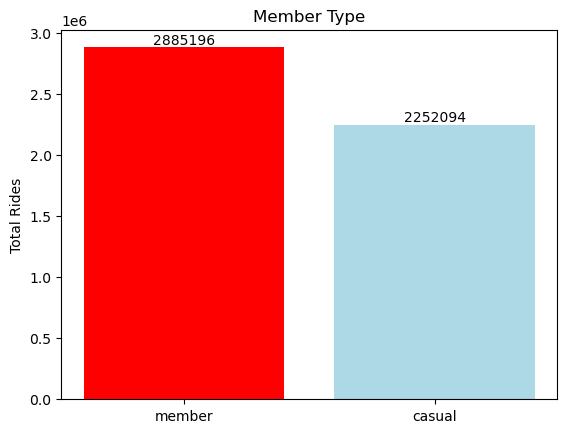

In [36]:
mc = ride_info_clean['member_casual'].value_counts().reset_index()

mm = mc.loc[:,'count'][0]
cc = mc.loc[:,'count'][1]
tc = mc['count'].sum()

p_m = (mm/tc) * 100 # Members = 56.16%
p_c = (cc/tc) * 100 # Casuals = 43.84%

# Plot a bargraph
def addlabels(x,y,labels):
    for i in range(len(x)):
        plt.text(i,y[i],labels[i], ha='center', va='bottom')

color = ['red','lightblue']
plt.bar(x = mc['member_casual'] , height = mc['count'], color=color)
addlabels(mc.index, mc['count'], mc['count'])

plt.title('Member Type')
plt.ylabel('Total Rides')

plt.show()

# 6. Exploratory Data Analysis

## Understand Members and Casual Riders Behaviours

After cleaning our dataset, it is time we perform comparative exploratory data analysis to help us understand members and casual riders behviour. Then make data backed assumptions and decisions to achieve the aim of the project - Convert existing casual riders to annual members.

### Frequency of Rides
- By Month/Year
- By Day of Week

Analysis by day of the week

In [37]:
week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
month_order = ['Nov-20','Dec-20','Jan-21','Feb-21','Mar-21','Apr-21','May-21','Jun-21','Jul-21',
               'Aug-21','Sep-21','Oct-21','Nov-21']

In [38]:
# Create a function that takes the seconds and converts to a readable time clock
def readable_time(x):
    seconds = x % 60
    minutes = (x % 3600)/ 60
    hours = (x % 86400) / 3600
    x = int(x)

    print(f'{hours:.0f}' + ':' + f'{minutes:.0f}' + ':' + f'{seconds:.0f}')


Create a dataframe to count number of rides by the month

In [39]:
# Group data by month and member/casual
month_grouped = ride_info_clean.groupby(['month','member_casual']).count()[['ride_id']].reset_index()

# Reset index to order my month 
month_grouped.index = pd.CategoricalIndex(month_grouped['month'], categories=month_order, ordered=True)
month_grouped = month_grouped.sort_index().reset_index(drop=True)
month_grouped.head()

,month,member_casual,ride_id
0,Nov-20,member,162196
1,Nov-20,casual,76184
2,Dec-20,casual,26432
3,Dec-20,member,96224
4,Mar-21,casual,70304


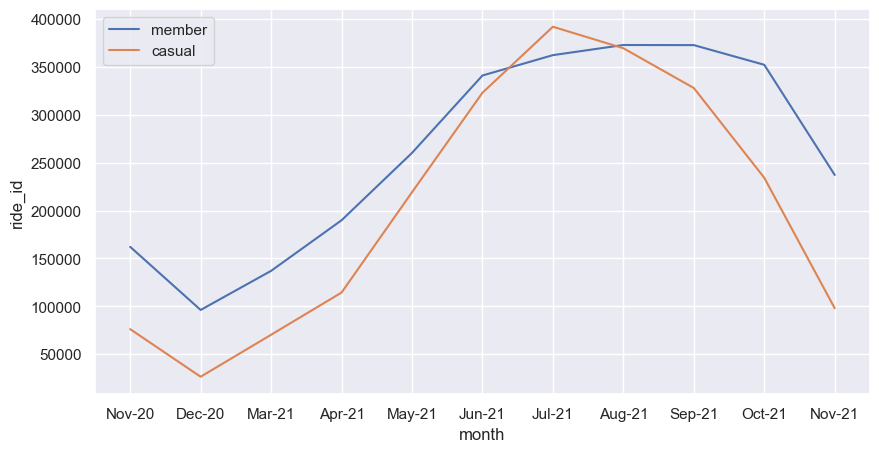

In [40]:
# Plot a line chart to show monthly number of rides through the year
sns.set(style = 'darkgrid')
plt.figure(figsize=(10,5))
sns.lineplot(data = month_grouped, x='month', y='ride_id', hue='member_casual')
plt.legend()
plt.show()

Now let's analyze the number of rides on a weekly basis

In [41]:
week_grouped = ride_info_clean.groupby(['day','member_casual']).count()[['ride_id']].reset_index()
week_grouped.head()

,day,member_casual,ride_id
0,Friday,casual,326221
1,Friday,member,414242
2,Monday,casual,252865
3,Monday,member,398991
4,Saturday,casual,499145


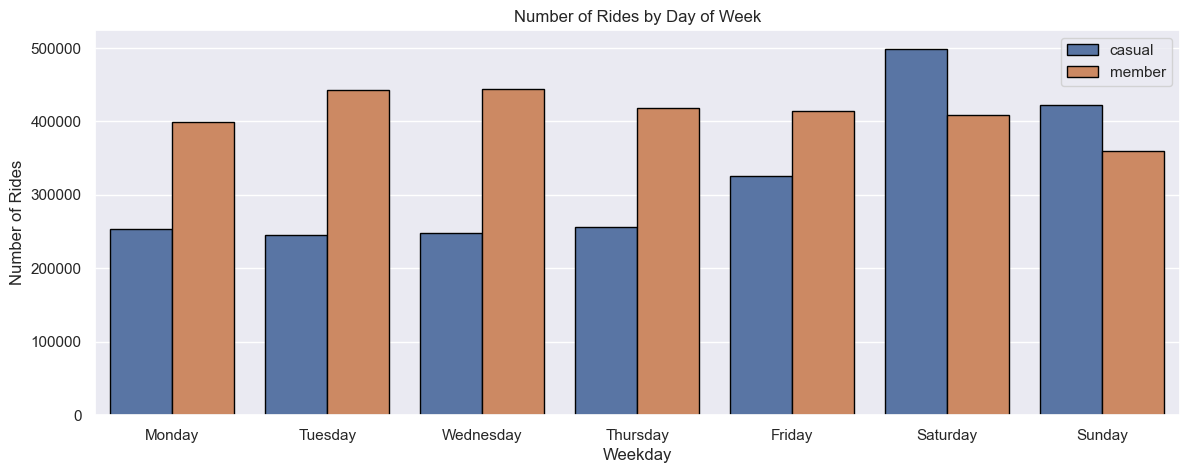

In [42]:
# Plot a double bar graph to show number of rides by weekday
sns.set(style = 'darkgrid')
plt.figure(figsize=(14,5))
sns.barplot(data = week_grouped, 
            x = week_grouped['day'],
            y = week_grouped['ride_id'], 
            hue = week_grouped['member_casual'],
            edgecolor = 'black',
            order = week_order,
            )

plt.xlabel('Weekday')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by Day of Week')

#show legend
plt.legend()

#show graph
plt.show()

Find the average ride duration for both annual and casual members, then plot it on a bar graph

In [43]:
# Average ride duration of all trips
ride_info_clean['ride_duration(s)'].mean()
readable_time(ride_info_clean['ride_duration(s)'].mean())

0:17:38


In [44]:
r2 = ride_info_clean.groupby('member_casual').mean(numeric_only=True)[['ride_duration(s)']].reset_index()
r2['ride_duration(s)'] = r2['ride_duration(s)'].astype(float)
r2['readable_time'] = pd.to_datetime(r2['ride_duration(s)'], unit = 's').dt.strftime('%H:%M:%S')
r2

,member_casual,ride_duration(s),readable_time
0,casual,1280.917649,00:21:20
1,member,777.705795,00:12:57


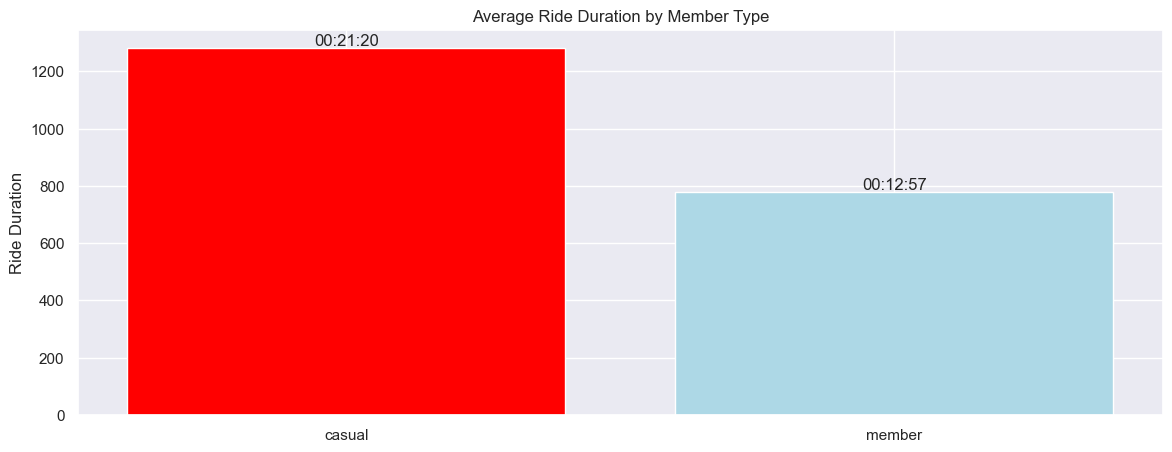

In [45]:
def addlabels(x,y,labels):
    for i in range(len(x)):
        plt.text(i,y[i],labels[i], ha='center', va='bottom')

color = ['red','lightblue']
plt.figure(figsize=(14,5))

# Plot a bargraph
plt.bar(x = r2['member_casual'] , height = r2['ride_duration(s)'], color=color)
addlabels(r2.index, r2['ride_duration(s)'], r2['readable_time'])

plt.title('Average Ride Duration by Member Type')
plt.ylabel('Ride Duration')

plt.show()

From our initial analysis, we see Casual Riders [00:21:16] on average spend more time on bikes than Members [00:12:56].

Preferred Time

In [46]:
ride_info_clean_m = ride_info_clean[ride_info_clean['member_casual'] == 'member'] # Filtered for Annual Members
ride_info_clean_c = ride_info_clean[ride_info_clean['member_casual'] == 'casual'] # Filtered for Casual Riders

time preference members

In [47]:
time_preference = ride_info_clean_m.groupby(['day','start_time']).count()['ride_id'].reset_index()
time_preference.index = pd.CategoricalIndex(time_preference['day'], categories= week_order, ordered=True)
time_preference = time_preference.sort_index().reset_index(drop=True)

time_preference['start_time'] = pd.to_datetime(time_preference['start_time'], format='%H:%M:%S').dt.time
# Convert 'ride_id' to integer
time_preference['ride_id'] = time_preference['ride_id'].astype(int)

# Convert time to minutes since midnight
time_preference['time_minutes'] = time_preference['start_time'].apply(lambda x: x.hour * 60 + x.minute)

time_preference.head()

,day,start_time,ride_id,time_minutes
0,Monday,23:07:52,1,1387
1,Monday,09:56:17,4,596
2,Monday,09:56:16,6,596
3,Monday,09:56:15,3,596
4,Monday,09:56:14,1,596


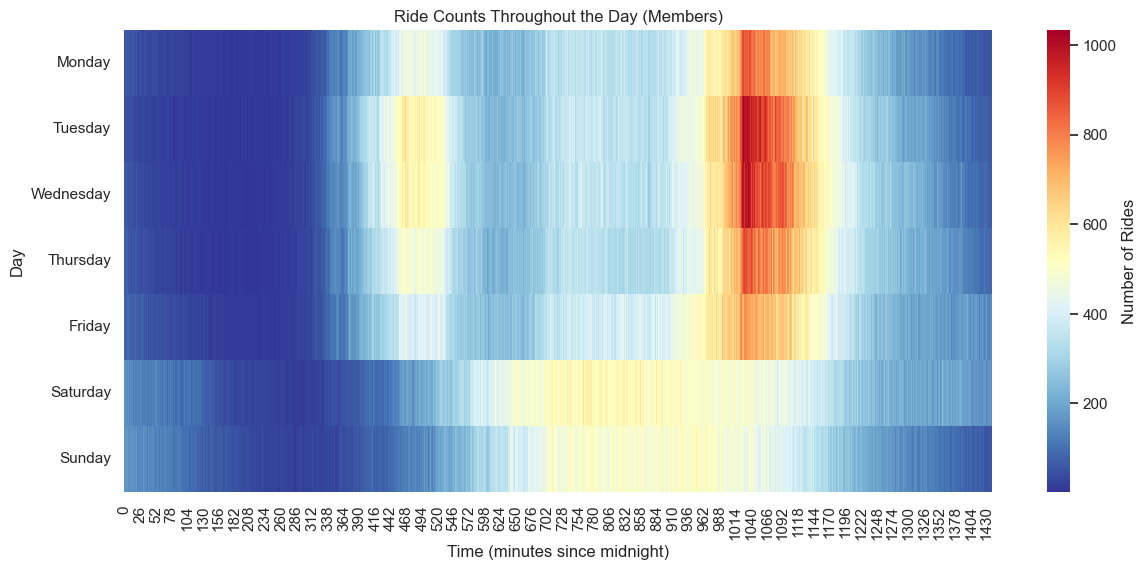

In [48]:
# Create pivot table for heatmap
heatmap_data = time_preference.pivot_table(index='day', columns='time_minutes', values='ride_id', aggfunc='sum')
heatmap_data = heatmap_data.reindex(week_order[::1])

# Plotting heatmap using seaborn
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="RdYlBu_r", cbar_kws={'label': 'Number of Rides'})
#sns.heatmap(heatmap_data, cmap = 'crest')
plt.title('Ride Counts Throughout the Day (Members)')
plt.xlabel('Time (minutes since midnight)')
plt.ylabel('Day')
plt.show()

time preference casuals

In [49]:
time_preference = ride_info_clean_c.groupby(['day','start_time']).count()['ride_id'].reset_index()
time_preference.index = pd.CategoricalIndex(time_preference['day'], categories= week_order, ordered=True)
time_preference = time_preference.sort_index().reset_index(drop=True)

time_preference['start_time'] = pd.to_datetime(time_preference['start_time'], format='%H:%M:%S').dt.time
# Convert 'ride_id' to integer
time_preference['ride_id'] = time_preference['ride_id'].astype(int)

# Convert time to minutes since midnight
time_preference['time_minutes'] = time_preference['start_time'].apply(lambda x: x.hour * 60 + x.minute)
time_preference.sample(3)

,day,start_time,ride_id,time_minutes
244894,Thursday,22:47:05,2,1367
35993,Monday,19:27:30,5,1167
326221,Friday,11:59:36,2,719


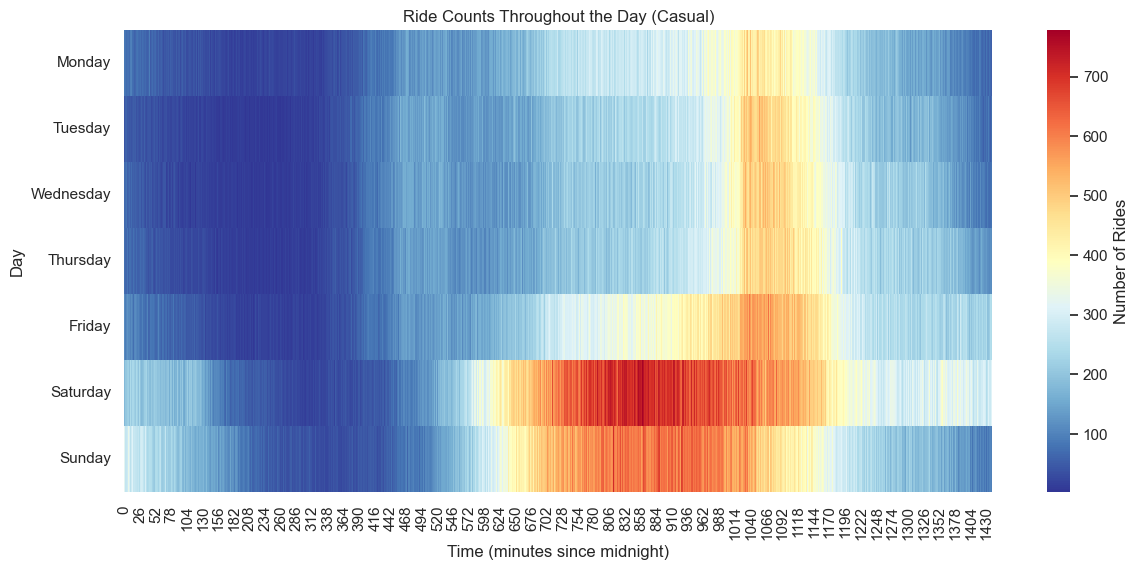

In [50]:

# Create pivot table for heatmap
heatmap_data = time_preference.pivot_table(index='day', columns='time_minutes', values='ride_id', aggfunc='sum')
heatmap_data = heatmap_data.reindex(week_order[::1])

# Plotting heatmap using seaborn
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="RdYlBu_r", cbar_kws={'label': 'Number of Rides'}, yticklabels=week_order[::1])
#sns.heatmap(heatmap_data, cmap = 'crest')
plt.title('Ride Counts Throughout the Day (Casual)')
plt.xlabel('Time (minutes since midnight)')
plt.ylabel('Day')
plt.show()

Bike Preference

In [51]:
bike_preference = ride_info_clean.groupby(['member_casual','rideable_type']).count()[['ride_id']].reset_index()
bike_preference

,member_casual,rideable_type,ride_id
0,casual,classic_bike,1102118
1,casual,docked_bike,263470
2,casual,electric_bike,886506
3,member,classic_bike,1792885
4,member,docked_bike,106469
5,member,electric_bike,985842


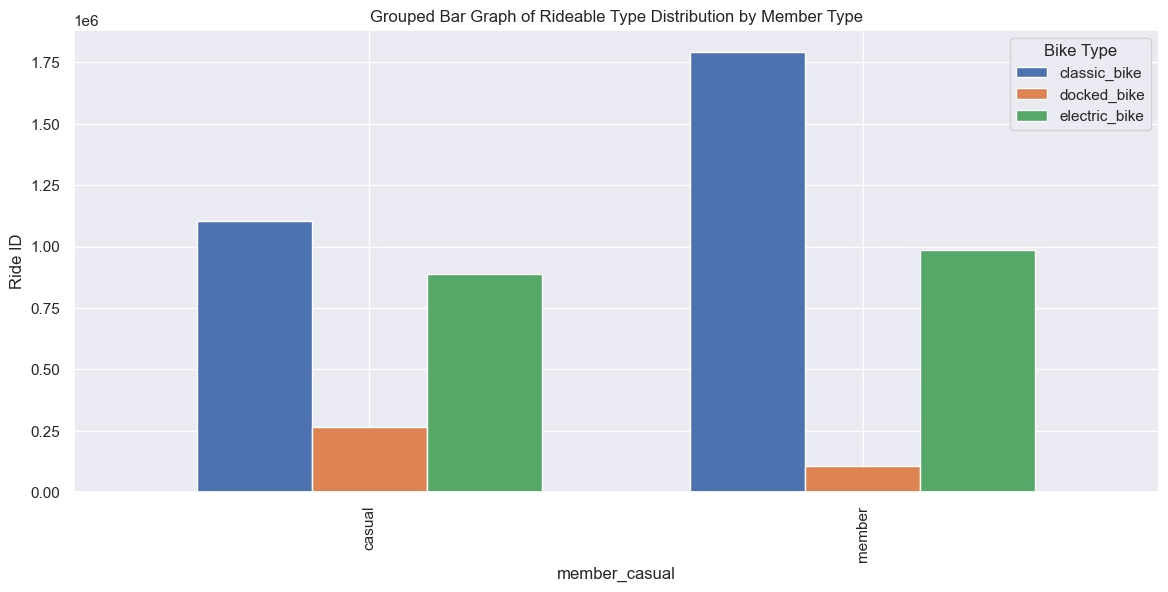

In [52]:
# Pivot the DataFrame to prepare for a grouped bar chart
pivot_df = bike_preference.pivot_table(index='member_casual', columns='rideable_type', 
                                       values='ride_id', aggfunc='sum')

# Plotting
fig, ax = plt.subplots(figsize=(14, 6))

# Create grouped bar chart
pivot_df.plot(kind='bar', ax=ax, width=0.7)

# Add labels and title
ax.set_ylabel('Ride ID')
ax.set_title('Grouped Bar Graph of Rideable Type Distribution by Member Type')

# Display the legend
ax.legend(title='Bike Type')

# Show the plot
plt.show()

## Explore Station Info

### New Dataframe - Start Stations: store information regarding the start stations.

In [53]:
df_months_clean.sample(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,ride_duration,ride_duration(s),start_time,end_time,day,month,start_position,end_position,trip_distance
349001,12E627132E421B1E,classic_bike,2021-08-08 13:49:51,2021-08-08 14:04:44,Federal St & Polk St,SL-008,Michigan Ave & 18th St,13150,41.872078,-87.629544,...,casual,0 days 00:14:53,893.0,13:49:51,14:04:44,Sunday,Aug-21,"(41.87207763285, -87.6295437729)","(41.857813, -87.62455)",1.64
646929,A0BB96D0BE3A9553,electric_bike,2021-08-02 13:13:44,2021-08-02 13:20:02,NaN,NaN,NaN,NaN,41.900000,-87.710000,...,member,0 days 00:06:18,378.0,13:13:44,13:20:02,Monday,Aug-21,"(41.9, -87.71)","(41.9, -87.7)",0.83
344643,FDD271F780B6713A,docked_bike,2021-05-16 11:17:17,2021-05-16 12:34:22,Ada St & Washington Blvd,13353,Millennium Park,13008,41.882830,-87.661206,...,casual,0 days 01:17:05,4625.0,11:17:17,12:34:22,Sunday,May-21,"(41.88283, -87.661206)","(41.881032, -87.624084)",3.09


In [54]:
start_station = df_months_clean.loc[:,['start_station_id', 'start_station_name','start_lat','start_lng','member_casual']]
start_station.sample(3)

,start_station_id,start_station_name,start_lat,start_lng,member_casual
217144,TA1307000117,Wabash Ave & Grand Ave,41.891466,-87.626761,member
654758,KA1504000146,Clark St & Berwyn Ave,41.977997,-87.668047,casual
671469,13332,Loomis St & Lexington St,41.872187,-87.661501,member


### Fill the 'NaN' values

In [55]:
ss = start_station.sort_values(['start_lat','start_lng'], ascending=[True, True])
ss.isna().sum()

start_station_id      571168
start_station_name    571076
start_lat                  0
start_lng                  0
member_casual              0
dtype: int64

In [56]:
# Use a forward fill to fill NaN values in ID and Names
ss_ff = ss.fillna(method='ffill')
ss_ff.isna().sum()

start_station_id      1
start_station_name    2
start_lat             0
start_lng             0
member_casual         0
dtype: int64

Find preferred start stations

In [97]:
# Store the top 20 stations
ss_count = ss_ff.value_counts().reset_index()
ss_top = ss_count.sort_values(by='count', ascending=False).head(20)

In [126]:
fig_s = px.scatter_mapbox(ss_top,
                        lat = 'start_lat',
                        lon = 'start_lng',
                        color="count",
                        size = 'count',
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=10,
                        zoom=10,
                        mapbox_style='carto-positron',
                         title = 'Top 20 Start Station')
fig_s.update_layout(margin={"r": 0, "t": 30, "l": 0, "b": 0}) # set margins of plot
fig_s.show()

Top 10 member stations

In [82]:
ss_m = ss_ff[ss_ff['member_casual'] == 'member'].value_counts().reset_index()

# Top 20 start stations - annual members
ss_mc_top = ss_m.sort_values(by='count', ascending=False).head(20)

show the position

In [125]:
start_member = px.scatter_mapbox(ss_mc_top,
                                 lat = 'start_lat',
                                 lon = 'start_lng',
                                 color= 'count',
                                 size = 'count',
                                 color_continuous_scale = px.colors.cyclical.IceFire,
                                 size_max=10,
                                 zoom=10,
                                 mapbox_style= 'carto-positron',
                                title = 'Top 20 Annual Members Start Station')
start_member.update_layout(margin={"r": 0, "t": 30, "l": 0, "b": 0}) # set margins of plot
start_member.show()

Top 10 casual stations

In [119]:
ss_c = ss_ff[ss_ff['member_casual'] == 'casual'].value_counts().reset_index()

# Top 10 start stations - annual members
ss_cc_top = ss_c.sort_values(by='count', ascending=False).head(20)

In [120]:
start_casual = px.scatter_mapbox(ss_cc_top,
                                 lat = 'start_lat',
                                 lon = 'start_lng',
                                 color= 'count',
                                 size = 'count',
                                 color_continuous_scale=px.colors.cyclical.IceFire,
                                 size_max=10,
                                 zoom=10,
                                 mapbox_style='carto-positron',
                                title = 'Top 20 Casual Riders Start Station')
start_casual.update_layout(margin={"r": 0, "t": 30, "l": 0, "b": 0}) # set margins of plot
start_casual.show()

### New Dataframe -  End Stations

In [62]:
end_station = df_months_clean.loc[:,['end_station_id','end_station_name','end_lat','end_lng','member_casual']]
end_station.sample(3)

,end_station_id,end_station_name,end_lat,end_lng,member_casual
751708,13179,Clark St & Lincoln Ave,41.915689,-87.634600,casual
52554,13068,Western Ave & Winnebago Ave,41.915520,-87.687022,member
463757,NaN,NaN,41.890000,-87.630000,member


### Fill NaN values in End Station

In [63]:
es = end_station.sort_values(['end_lat','end_lng'], ascending=[True, True])
es.isna().sum()

end_station_id      612575
end_station_name    612510
end_lat                  0
end_lng                  0
member_casual            0
dtype: int64

In [64]:
es_ff = es.fillna(method='ffill')
es_ff.isna().sum()

end_station_id      35
end_station_name    35
end_lat              0
end_lng              0
member_casual        0
dtype: int64

We have succesfully reduced the number of NaN values to just 35.
So now we can find the top 10 stations.

In [94]:
# Store the top 20 stations
es_count = es_ff.value_counts().reset_index()
es_top = es_count.sort_values(by='count', ascending=False).head(20)

In [127]:
fig_e = px.scatter_mapbox(es_top,
                        lat = 'end_lat',
                        lon = 'end_lng',
                        color="count",
                        size = 'count',
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=10,
                        zoom=10,
                        mapbox_style='carto-positron',
                         title = 'Top 20 End Station')
fig_e.update_layout(margin={"r": 0, "t": 30, "l": 0, "b": 0}) # set margins of plot
fig_e.show()

top 10 end stations - members

In [114]:
es_m = es_ff[es_ff['member_casual'] == 'member'].value_counts().reset_index()

# Top 20 start stations - annual members
es_mc_top = es_m.sort_values(by='count', ascending=False).head(20)

In [124]:
end_member = px.scatter_mapbox(es_mc_top,
                                 lat = 'end_lat',
                                 lon = 'end_lng',
                                 color= 'count',
                                 size = 'count',
                                 color_continuous_scale = px.colors.cyclical.IceFire,
                                 size_max=10,
                                 zoom=10,
                                 mapbox_style= 'carto-positron',
                              title = 'Top 20 Annual Members End Station')
end_member.update_layout(margin={"r": 0, "t": 30, "l": 0, "b": 0}) # set margins of plot
end_member.show()

top 10 casual stations

In [117]:
es_c = es_ff[es_ff['member_casual'] == 'casual'].value_counts().reset_index()

# Top 20 start stations - annual members
es_cc_top = es_c.sort_values(by='count', ascending=False).head(20)

In [123]:
end_casual = px.scatter_mapbox(es_cc_top,
                                 lat = 'end_lat',
                                 lon = 'end_lng',
                                 color= 'count',
                                 size = 'count',
                                 color_continuous_scale = px.colors.cyclical.IceFire,
                                 size_max=10,
                                 zoom=10,
                                 mapbox_style= 'carto-positron',
                              title = 'Top 20 Casual Riders End Station')
end_casual.update_layout(margin={"r": 0, "t": 30, "l": 0, "b": 0}) # set margins of plot
end_casual.show()